In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [53]:
data = pd.read_csv("spamham.csv")
data.head()

,text_type,text
0,spam,naturally irresistible your corporate identity...
1,spam,the stock trading gunslinger fanny is merrill ...
2,spam,unbelievable new homes made easy im wanting to...
3,spam,4 color printing special request additional in...
4,spam,do not have money get software cds from here s...


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20348 entries, 0 to 20347
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text_type  20348 non-null  object
 1   text       20348 non-null  object
dtypes: object(2)
memory usage: 318.1+ KB


In [55]:
data.describe()

,text_type,text
count,20348,20348
unique,2,20334
top,ham,SPAM ALERT 🚔 User: Username: @DillyBubbl...
freq,14337,8


In [56]:
# Checking for null values in each column
print("Missing values per column:")
print(data.isnull().sum())

Missing values per column:
text_type    0
text         0
dtype: int64


In [57]:
#This counts how many rows are NOT equal to their lowercase version.
non_lowercase_count = data[data['text'] != data['text'].str.lower()].shape[0]

print(f"Number of rows with uppercase letters: {non_lowercase_count}")
print(f"Percentage of non-lowercase rows: {(non_lowercase_count/len(data))*100:.2f}%")

Number of rows with uppercase letters: 21
Percentage of non-lowercase rows: 0.10%


In [58]:
#Standardizing everything to lowercase so 'Free' and 'free' match
data['text'] = data['text'].str.lower()

#Removing extra whitespace at the start/end of sentences
data['text'] = data['text'].str.strip()

print("Minor text standardization complete.")

Minor text standardization complete.


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

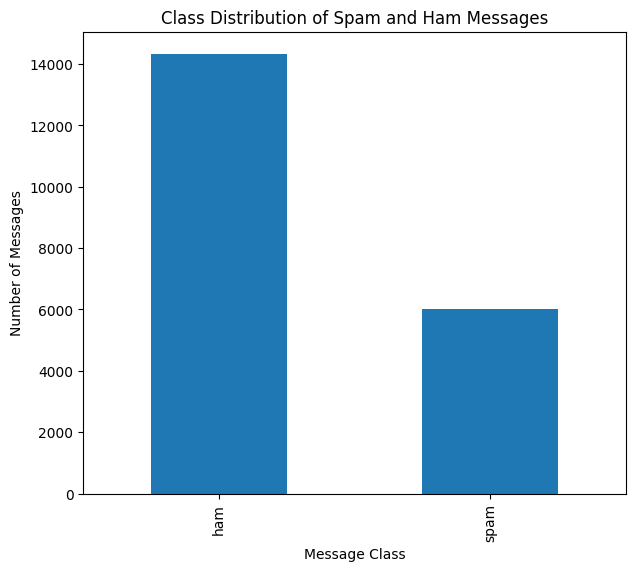

In [60]:
plt.figure(figsize=(7, 6))
data['text_type'].value_counts().plot(kind='bar')
plt.title("Class Distribution of Spam and Ham Messages")
plt.xlabel("Message Class")
plt.ylabel("Number of Messages")
plt.show()

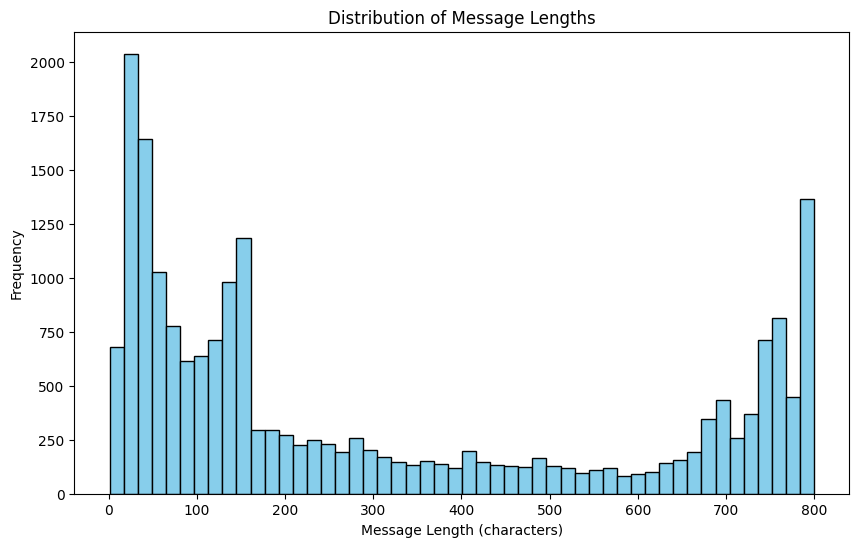

In [61]:
# Creating the length column first to avoid the KeyError
data['message_len'] = data['text'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(data['message_len'], bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Message Lengths")
plt.xlabel("Message Length (characters)")
plt.ylabel("Frequency")
plt.show()

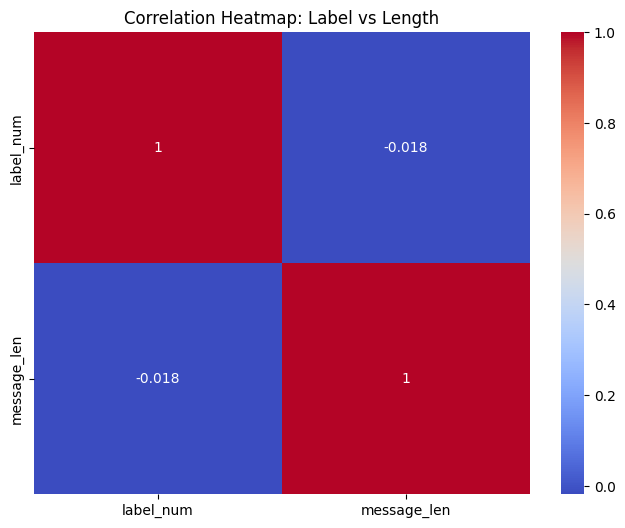

In [65]:
import seaborn as sns

data['label_num'] = data['text_type'].map({'ham': 0, 'spam': 1})

plt.figure(figsize=(8, 6))
sns.heatmap(data[['label_num', 'message_len']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Label vs Length")
plt.show()

In [66]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),
    max_features=5000
)

x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)


model = LogisticRegression(max_iter=1000)
model.fit(x_train_vec, y_train)
y_pred=model.predict(x_test_vec)
accuracy=accuracy_score(y_test,y_pred)

print(f"Logistic Regression\n")

print("accuracy",accuracy)
Report=classification_report(y_test,y_pred)

print(Report)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

new_review=["Wanna win 2500 rs per day?"]
new_review_vec=vectorizer.transform(new_review)
pred_classification=model.predict(new_review_vec)
print("Predicted Classification",pred_classification)

Logistic Regression

accuracy 0.9346437346437346
              precision    recall  f1-score   support

         ham       0.94      0.97      0.96      2913
        spam       0.92      0.84      0.88      1157

    accuracy                           0.93      4070
   macro avg       0.93      0.91      0.92      4070
weighted avg       0.93      0.93      0.93      4070

Confusion Matrix:
[[2830   83]
 [ 183  974]]
Predicted Classification ['spam']


In [70]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),
    max_features=5000
)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

model = MultinomialNB()
model.fit(x_train_vec, y_train)

y_pred = model.predict(x_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"Naive bayes\n")

print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

new_texts = ["Good morning everyone", "I am from amazon company"]
new_vec = vectorizer.transform(new_texts)
predictions = model.predict(new_vec)
print("\nPredictions for new texts:", predictions)

Naive bayes

Accuracy: 0.9221

Classification Report:
              precision    recall  f1-score   support

         ham       0.95      0.94      0.95      2913
        spam       0.86      0.87      0.86      1157

    accuracy                           0.92      4070
   macro avg       0.90      0.91      0.90      4070
weighted avg       0.92      0.92      0.92      4070

Confusion Matrix:
[[2743  170]
 [ 147 1010]]

Predictions for new texts: ['ham' 'spam']


In [71]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),
    max_features=5000
)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

model = LinearSVC()
model.fit(x_train_vec, y_train)

y_pred = model.predict(x_test_vec)

print(f"SVM\n")

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

new_texts = ["You won a free iphone", "Hello are you there"]
new_vec = vectorizer.transform(new_texts)
predictions = model.predict(new_vec)
print("\nPredictions for new texts:", predictions)

SVM

Accuracy: 0.9405

Classification Report:
              precision    recall  f1-score   support

         ham       0.95      0.96      0.96      2913
        spam       0.91      0.88      0.89      1157

    accuracy                           0.94      4070
   macro avg       0.93      0.92      0.93      4070
weighted avg       0.94      0.94      0.94      4070

Confusion Matrix:
[[2807  106]
 [ 136 1021]]

Predictions for new texts: ['spam' 'ham']


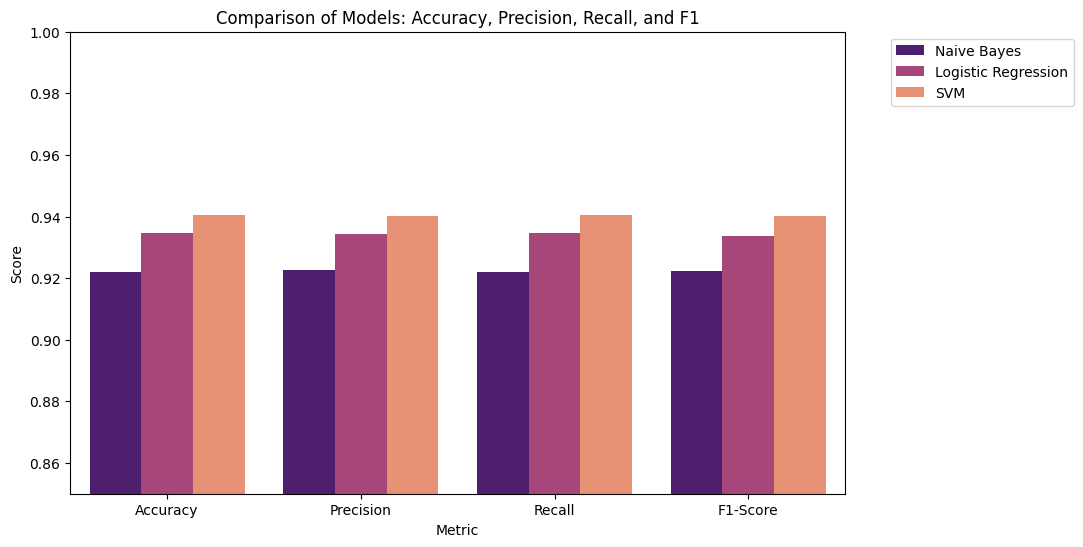

                 Model  Accuracy  Precision    Recall  F1-Score
0          Naive Bayes  0.922113   0.922640  0.922113  0.922342
1  Logistic Regression  0.934644   0.934207  0.934644  0.933719
2                  SVM  0.940541   0.940188  0.940541  0.940302


In [73]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# 1. Define the models you have already imported
models = {
    'Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': LinearSVC()
}

# 2. Collect accuracy, precision, recall, and f1 for each
results = []
for name, model_obj in models.items():
    model_obj.fit(x_train_vec, y_train)
    y_pred = model_obj.predict(x_test_vec)
    
    # Calculate all metrics at once
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    results.append({'Model': name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1})

# 3. Create a DataFrame and Plot
df_results = pd.DataFrame(results)
df_plot = df_results.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Metric', y='Score', hue='Model', palette='magma')
plt.title('Comparison of Models: Accuracy, Precision, Recall, and F1')
plt.ylim(0.85, 1.0) # Zoom in to see which model is winning
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Print the numbers so you can copy them into your report
print(df_results)

In [74]:
from sklearn.model_selection import cross_val_score

#Checking the Cross-Validation for all the models
models_to_check = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'SVM': LinearSVC()
}

print("5-Fold Cross-Validation Results")

for name, model_obj in models_to_check.items():
    #cv=5 means the data is splited into 5 different groups to test
    cv_scores = cross_val_score(model_obj, x_train_vec, y_train, cv=5)
    
    print(f"\n{name}:")
    print(f"Individual Scores: {cv_scores}")
    print(f"Average Accuracy: {cv_scores.mean() * 100:.2f}%")

5-Fold Cross-Validation Results

Logistic Regression:
Individual Scores: [0.93028256 0.92659705 0.93120393 0.9265745  0.93149002]
Average Accuracy: 92.92%

Naive Bayes:
Individual Scores: [0.92076167 0.91799754 0.92536855 0.92380952 0.92288786]
Average Accuracy: 92.22%

SVM:
Individual Scores: [0.93519656 0.93396806 0.94133907 0.94070661 0.94193548]
Average Accuracy: 93.86%


In [75]:
from sklearn.model_selection import GridSearchCV

#Choosing the model and the settings (parameters) which we want to test
param_grid = {'C': [0.1, 1, 10, 100]} 

#Using GridSearchCV to find the best 'C'
#cv=5 means it uses Cross-Validation while testing these settings
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(x_train_vec, y_train)

print(f"Best Setting (C): {grid.best_params_}")
print(f"Best Accuracy found: {grid.best_score_ * 100:.2f}%") 

Best Setting (C): {'C': 10}
Best Accuracy found: 93.97%
